Выбираем вариант практической работы при помощи генератора случайных чисел

In [1]:
from random import randint

randint(1, 12)

5

Задаем постоянные величины для расчета показателей проекта

In [1]:
duration = 4 # срок проекта
tax_rate = 0.4 # ставка налога
amortization = 30_000 # амортизация
initial_investment = 300_000 # начальные инвестиции

Сгенерируем список из сотни значений для характеристики "Объем выпуска, тыс. шт.", распределенной по нормальному закону. Для воспроизводимости результатов эксперимента зафиксируем зерно псевдослучайного генератора

In [21]:
import numpy as np

np.random.seed(42)

mean = 6500
std_dev = 370
num_samples = 10000

values = np.random.normal(mean, std_dev, num_samples)
values

array([6683.78423661, 6448.84220857, 6739.6447591 , ..., 6239.03281215,
       6683.43326202, 6738.42372781])

Визуализируем распределение величины

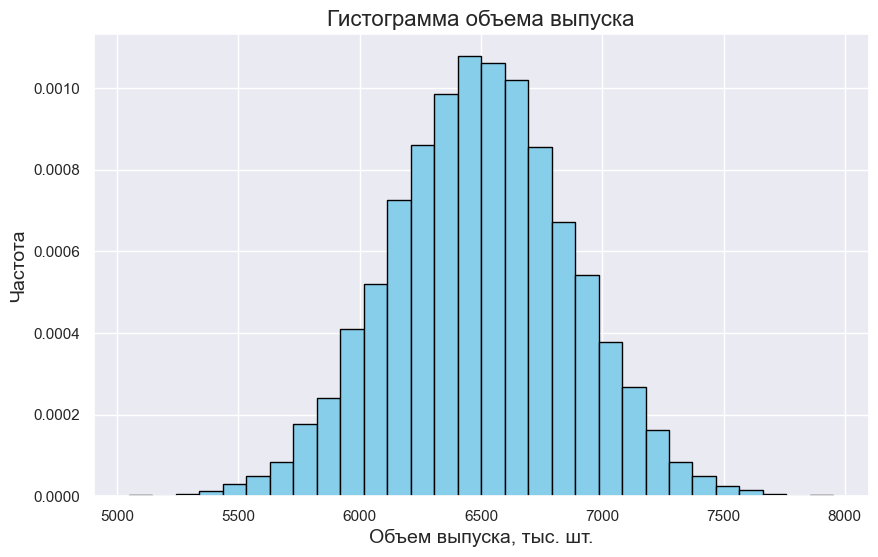

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10, 6))  
plt.hist(values, bins=30, density=True, color='skyblue', edgecolor='black')  
plt.xlabel('Объем выпуска, тыс. шт.', fontsize=14) 
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма объема выпуска', fontsize=16) 
plt.grid(True)
plt.show()

Аналогично сгенерируем величину постоянных затрат и норму дисконта, имеющих равномерный закон распределения.

In [29]:
import numpy as np

np.random.seed(42) 

# Постоянные затраты, руб.
low_cost = 40000
high_cost = 90000

costs = np.random.uniform(low_cost, high_cost, num_samples)

# Норма дисконта, %
low_discount = 0.08
high_discount = 0.14

discounts = np.random.uniform(low_discount, high_discount, num_samples)

Также построим графики распределения величин:

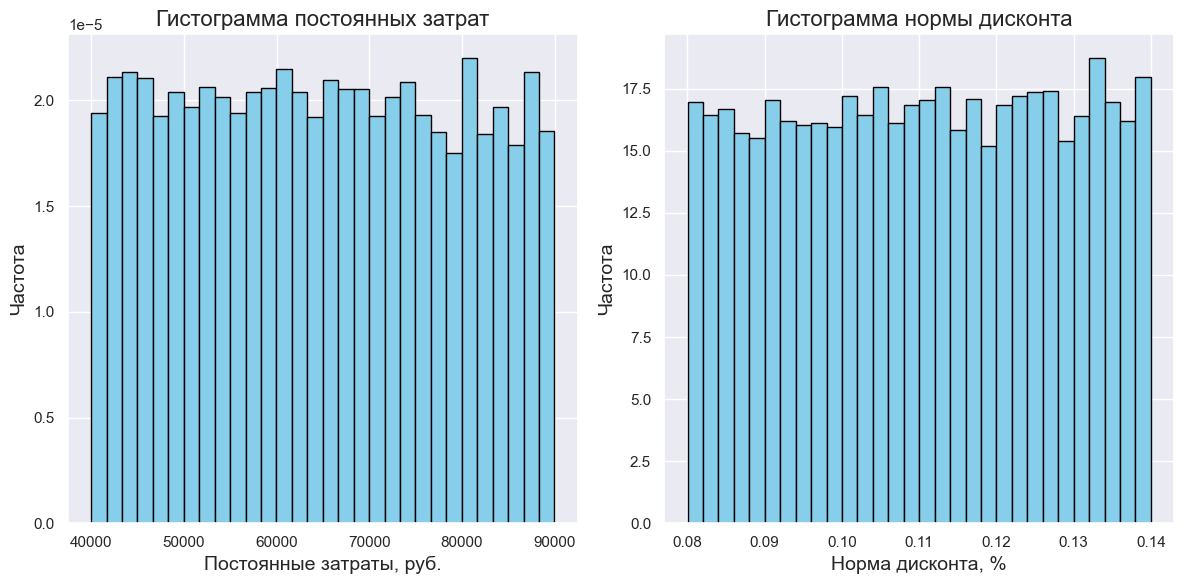

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(12, 6))

# График для постоянных затрат
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й график
plt.hist(costs, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Постоянные затраты, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма постоянных затрат', fontsize=16)
plt.grid(True)

# График для нормы дисконта
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-й график
plt.hist(discounts, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Норма дисконта, %', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма нормы дисконта', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()


Сгенерируем список значений остаточной стоимости по экспоненциальному закону распределения

In [31]:
import numpy as np

np.random.seed(0) 

# Остаточная стоимость, руб.
scale = 1 / 0.00005  # Параметр масштаба для экспоненциального распределения равен обратному значению параметра распределения

residual_values = np.random.exponential(scale, num_samples)


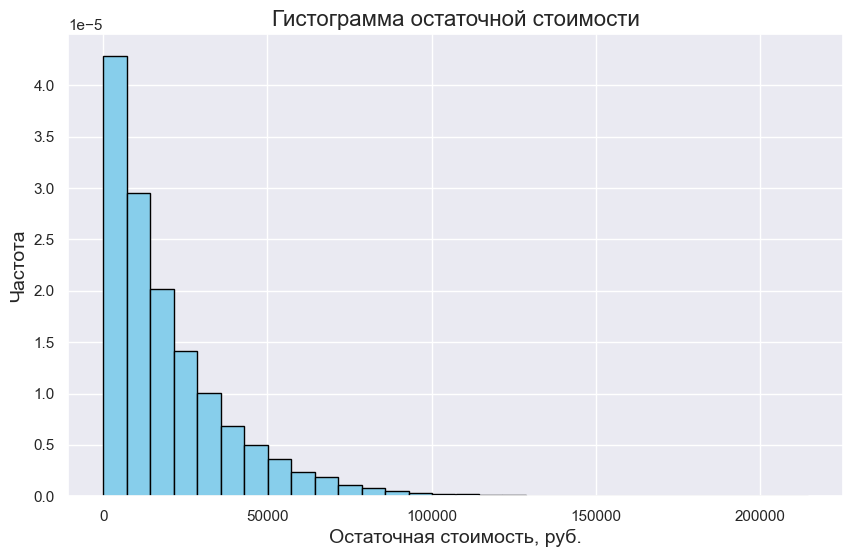

In [32]:
sns.set()

plt.figure(figsize=(10, 6))
plt.hist(residual_values, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Остаточная стоимость, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма остаточной стоимости', fontsize=16)
plt.grid(True)
plt.show()


Сгенирируем список значений для цены продукции, по треугольному закону распределения

In [37]:
np.random.seed(42)

# Цена за штуку, руб.
left = 180
mode = 270
right = 310

num_samples = 10_000

prices = np.random.triangular(left, mode, right, num_samples)


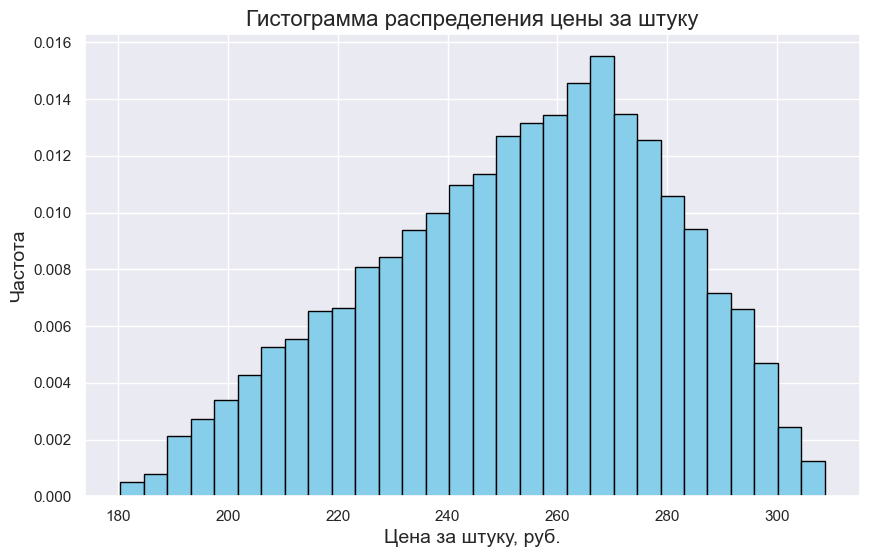

In [40]:
sns.set()

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Цена за штуку, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения цены за штуку', fontsize=16)
plt.grid(True)
plt.show()


Сгенирируем список значений для переменных затрат, по треугольному закону распределения

In [41]:
np.random.seed(42)

# Переменные затраты, руб./шт.
left = 140
mode = 180
right = 220
num_samples = 10_000

variable_costs = np.random.triangular(left, mode, right, num_samples)


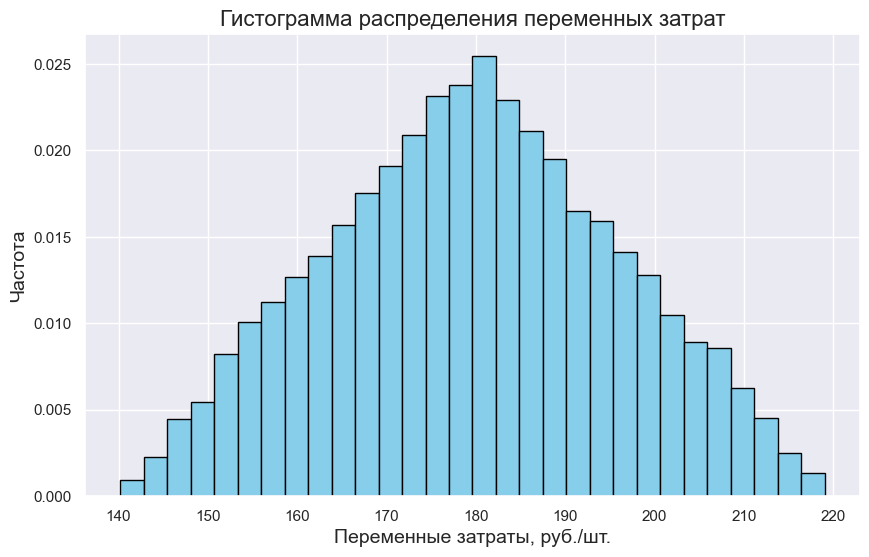

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(variable_costs, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Переменные затраты, руб./шт.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения переменных затрат', fontsize=16)
plt.grid(True)
plt.show()


Теперь по формуле сгенерирум список значений CFt (ежегодного дохода). numpy позволяет нам сделать это без явных циклов.

In [44]:
CFt = (1 - tax_rate) * (values * prices - variable_costs * values + amortization - costs)

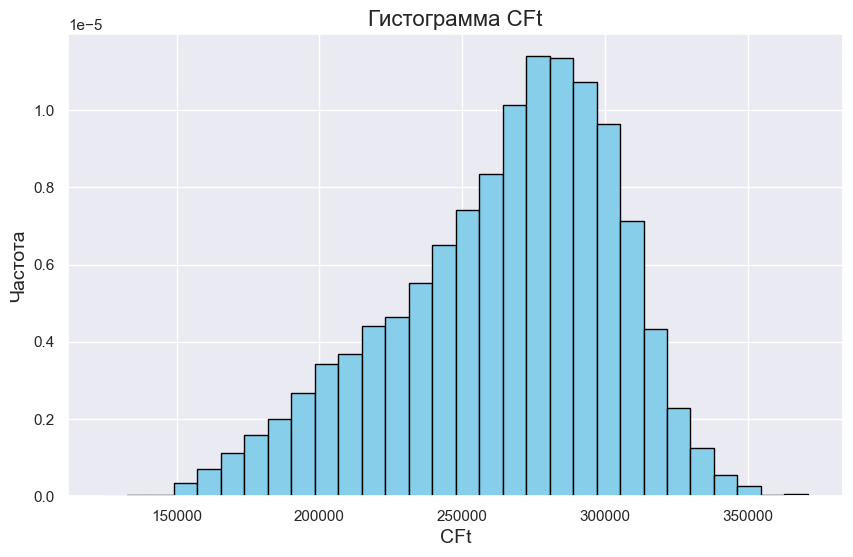

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(CFt, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('CFt', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма CFt', fontsize=16)
plt.grid(True)
plt.show()

NPV

In [50]:
NPV = CFt/(1 + discounts) + CFt/((1 + discounts)**2) + CFt/((1 + discounts)**3) + (CFt + residual_values)/((1 + discounts)**4) - initial_investment

In [51]:
NPV

array([561580.39019792, 669326.81205737, 694899.0744094 , ...,
       639399.19221925, 553251.23991878, 521508.12439173])

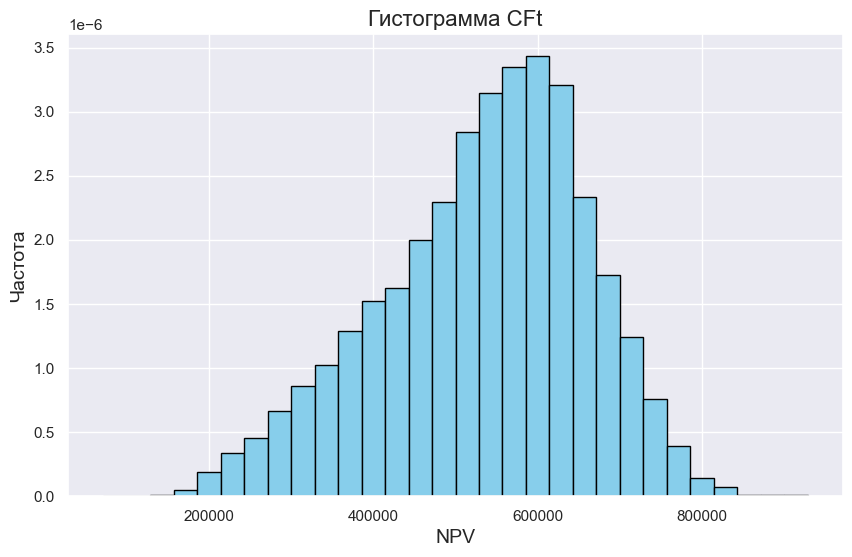

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(NPV, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('NPV', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма NPV', fontsize=16)
plt.grid(True)
plt.show()

PI

In [53]:
PI = (CFt/(1 + discounts) + CFt/((1 + discounts)**2) + CFt/((1 + discounts)**3) + (CFt + residual_values)/((1 + discounts)**4)) / initial_investment

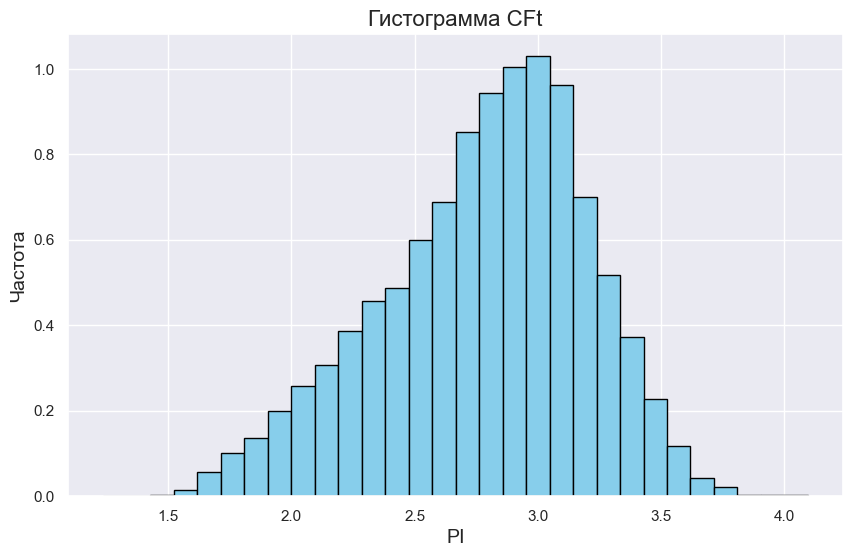

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(PI, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('PI', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма CFt', fontsize=16)
plt.grid(True)
plt.show()

Для вывод статистики напишем функцию:

In [59]:
import numpy as np
from scipy import stats

def print_statistics(values):
    print('Среднее:', np.mean(values))
    print('Стандартная ошибка:', stats.sem(values))
    print('Медиана:', np.median(values))
    print('Стандартное отклонение:', np.std(values))
    print('Дисперсия выборки:', np.var(values))
    print('Эксцесс:', stats.kurtosis(values))
    print('Ассиметричность:', stats.skew(values))
    print('Интервал:', np.ptp(values))
    print('Минимум:', np.min(values))
    print('Максимум:', np.max(values))
    print('Сумма:', np.sum(values))
    print('Счет:', len(values))



In [60]:
print('Статистические показатели характеристики "Ежегодный доход"')
print_statistics(CFt)

Статистические показатели характеристики "Ежегодный доход"
Среднее: 264429.07375216833
Стандартная ошибка: 388.4564148668747
Медиана: 271097.3829333297
Стандартное отклонение: 38843.699156053655
Дисперсия выборки: 1508832964.1260035
Эксцесс: -0.2047282017952008
Ассиметричность: -0.5497186638871635
Интервал: 246717.25354502985
Минимум: 124324.72353262854
Максимум: 371041.9770776584
Сумма: 2644290737.521683
Счет: 10000


In [61]:
print('Статистические показатели характеристики "Чистая приведенная стоимость"')
print_statistics(NPV)

Статистические показатели характеристики "Чистая приведенная стоимость"
Среднее: 533937.0748836562
Стандартная ошибка: 1255.84469732609
Медиана: 550162.4046981242
Стандартное отклонение: 125578.19035213393
Дисперсия выборки: 15769881892.116781
Эксцесс: -0.216979692354053
Ассиметричность: -0.42871442244429353
Интервал: 857576.8793683455
Минимум: 71065.5451190276
Максимум: 928642.4244873731
Сумма: 5339370748.836562
Счет: 10000


In [62]:
print('Статистические показатели характеристики "Норма доходности"')
print_statistics(PI)

Статистические показатели характеристики "Норма доходности"
Среднее: 2.7797902496121876
Стандартная ошибка: 0.004186148991086967
Медиана: 2.833874682327081
Стандартное отклонение: 0.4185939678404464
Дисперсия выборки: 0.17522090991240868
Эксцесс: -0.21697969235405257
Ассиметричность: -0.42871442244429464
Интервал: 2.858589597894485
Минимум: 1.2368851503967586
Максимум: 4.0954747482912435
Сумма: 27797.902496121875
Счет: 10000
